## Import

In [46]:
# Import Library
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns

## Load Data

In [47]:
df = pd.read_csv("Pokemon.csv")
data = load_iris()

In [48]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Mengelompokkan Data

Total 180-780 : dibagi menjadi low(150-367), medium(368-583), high(584-801)

HP 1-255 : dibagi menjadi low(0-100), medium(101-200), high(201-300)

Attack 5-190 : dibagi menjadi slow(1-67), medium(68-134), fast(135-201)

Defense 5-230 : dibagi menjadi weak(1-100), medium(101-200), strong(201-300)

Speed 5-180 : dibagi menjadi slow(1-67), medium(68-134), fast(135-201)

In [49]:
total = pd.cut(df.Total,bins=[150,367,583,801],labels=['Low','Medium','High'])
df.insert(4,'Total Cat',total)
hp = pd.cut(df.HP,bins=[0,100,200,300],labels=['Low','Medium','High'])
df.insert(6,'HP Cat',hp)
att = pd.cut(df.Attack,bins=[0,67,134,201],labels=['Slow','Medium','Fast'])
df.insert(8,'Attack Cat',att)
deff = pd.cut(df.HP,bins=[0,100,200,300],labels=['Weak','Strong','Medium'])
df.insert(10,'Deffense Cat',deff)
#spatk = pd.cut((df.Sp. Atk),bins=[0,67,134,201],labels=['Slow','Medium','Fast'])
#df.insert(11,'Sp. Atk Cat',spatk)
#spdef = pd.cut((df.Sp. Def),bins=[0,100,200,300],labels=['Weak','Strong','Medium'])
#df.insert(12,'Sp. Def Cat',spdef)
speed = pd.cut(df.Speed,bins=[0,50,100,150],labels=['Slow','Medium','Fast'])
df.insert(14,'Speed Cat',speed)

In [50]:
del df["Total"]
del df["HP"]
del df["Attack"]
del df["Defense"]
del df["Speed"]

In [51]:
df.head()

,#,Name,Type 1,Type 2,Total Cat,HP Cat,Attack Cat,Deffense Cat,Sp. Atk,Sp. Def,Speed Cat,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,Low,Low,Slow,Weak,65,65,Slow,1,False
1,2,Ivysaur,Grass,Poison,Medium,Low,Slow,Weak,80,80,Medium,1,False
2,3,Venusaur,Grass,Poison,Medium,Low,Medium,Weak,100,100,Medium,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,High,Low,Medium,Weak,122,120,Medium,1,False
4,4,Charmander,Fire,NaN,Low,Low,Slow,Weak,60,50,Medium,1,False


In [52]:
for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [53]:
df.head()

,#,Name,Type 1,Type 2,Total Cat,HP Cat,Attack Cat,Deffense Cat,Sp. Atk,Sp. Def,Speed Cat,Generation,Legendary
0,0,80,9,13,0,0,0,0,41,37,0,0,0
1,1,329,9,13,1,0,0,0,55,50,1,0,0
2,2,745,9,13,1,0,1,0,71,66,1,0,0
3,2,746,9,13,2,0,1,0,86,77,1,0,0
4,3,102,6,-1,0,0,0,0,36,22,1,0,0


Fitur-fitur yang kelompok kami gunakan

In [54]:
X = df[['Type 1', 'Type 2','Total Cat','HP Cat','Attack Cat','Deffense Cat','Speed Cat','Generation']] # Features
y = df[['Legendary']] # Target variable

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1)

### Decision Tree

In [56]:
# Membuat Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict datatest
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9270833333333334


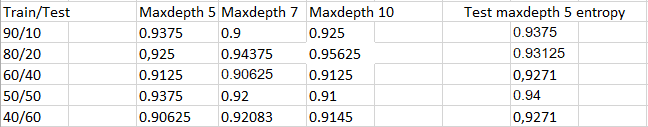

Untuk percobaan decision tree menggunakan Maxdepth 5,7,10 lebih baik yang maxdepth 5

Sedangkan untuk percobaan menggunakan gini dan entropy lebih baik menggunakan entropy

#Visualisasi Decision Tree

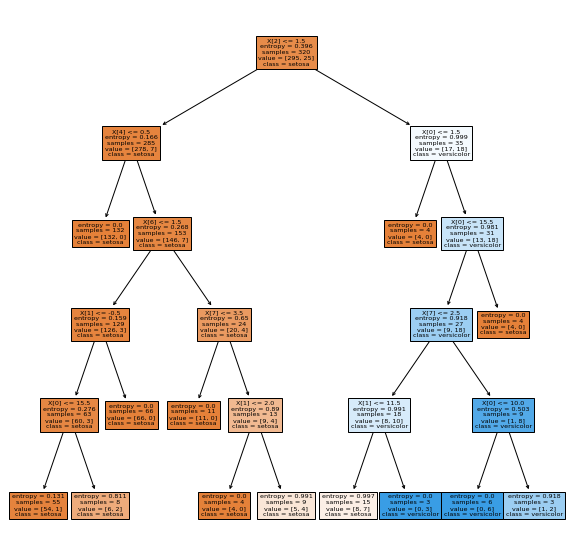

In [57]:
clf.predict(X_test)
cn=['setosa', 'versicolor', 'virginica']
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(clf, ax=ax, class_names=cn, filled = True);

### SVM

In [58]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Menghitung akurasi
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9458333333333333


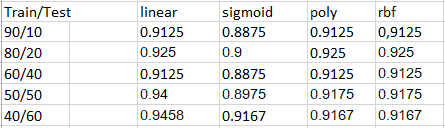

In [59]:
df.head()

,#,Name,Type 1,Type 2,Total Cat,HP Cat,Attack Cat,Deffense Cat,Sp. Atk,Sp. Def,Speed Cat,Generation,Legendary
0,0,80,9,13,0,0,0,0,41,37,0,0,0
1,1,329,9,13,1,0,0,0,55,50,1,0,0
2,2,745,9,13,1,0,1,0,71,66,1,0,0
3,2,746,9,13,2,0,1,0,86,77,1,0,0
4,3,102,6,-1,0,0,0,0,36,22,1,0,0


In [60]:
df.shape

(800, 13)

In [61]:
# not_used = ['','','Sp. Atk','']
# del df["#"]
del df["Name"]
del df["Sp. Atk"]
del df["Sp. Def"]
# del df["Speed"]
# df_used = df.drop[not_used, axis=1]
df.shape

(800, 10)

In [62]:
m = TSNE(learning_rate=50)

In [63]:
tsne_features = m.fit_transform(df)

tsne_features[1:4,:]

array([[-46.283737 ,   3.2465682],
       [-46.31314  ,   2.8758116],
       [-46.317978 ,   2.8766613]], dtype=float32)

In [64]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

In [67]:
sns.scatterplot(x="x", .y="y", data=df)
plt.show()

SyntaxError: ignored